## Project Description  

**In this project, I will try to predict whether a customer will subscribe to a term deposit or not.This is a binary classification problem since target value is simply binary variable which is "no" or "yes" ( can be represented as 0 and 1 ). In order to solve this problem, I will try different classifiers and evaluate them based on cross-validation accuracy scores.Before doing that, I will start with Exploratory Data Analysis (EDA) in order to check data types, missing values, statistical information of numeric attributes etc.After EDA, I will spend time on preprocessing the data for the machine learning model. It will include scaling numerical features, one-hot encoding of categorical features, feature selection, type conversions, creating features based on existing columns etc. After preprocessing the data, I will extract features and the
target variable from the data for training purposes. Since this is a supervised learning problem, it is important to preserve 
the labels/target variable in a different array. After all, model creation part comes into the place. I will choose among different classifiers that scikit-learn provides and decide which one to use it further. After picking the model, I will do 
hyper-parameter tuning of the model via GridSearchCV which is provided in scikit-learn machine learning library. Lastly, it is 
time to use the model with best hyper-parameter values to start predictions. I will evaluate the predictions based on the cross
validation accuracy scores. My aim is to create a model which performs above %81 percent accuracy and lets see what will happen.**

**As for the customer segmentation part, I will choose features that are affecting customer subscription rates and find meaningful insights in order to create better customer acquisition strategy. I will create customer segments which have
high subscription rates. It will help converting customers into subscribers.**

## Data Description 

**The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.**

**Attributes:**

**age : age of customer (numeric)**

**job : type of job (categorical)**

**marital : marital status (categorical)**

**education (categorical)**

**default: has credit in default? (binary)**

**balance: average yearly balance, in euros (numeric)**

**housing: has a housing loan? (binary)**

**loan: has personal loan? (binary)**

**contact: contact communication type (categorical)**

**day: last contact day of the month (numeric)**

**month: last contact month of year (categorical)**

**duration: last contact duration, in seconds (numeric)**

**campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)**

**Output (desired target):**

**y - has the client subscribed to a term deposit? (binary)**

### 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 

In [2]:
style.use("ggplot")

### 2. Importing Data

In [3]:
data = pd.read_csv("term-deposit-marketing-2020.csv")

In [4]:
type(data)

pandas.core.frame.DataFrame

### 3. Exploratory Data Analysis ( EDA ) & Data Preprocessing 

**To see how many observations and attributes our dataset has.**

In [5]:
data.shape

(40000, 14)

In [6]:
print("Dataset consists of {} rows/observations and {} attributes.".format(data.shape[0], data.shape[1]))

Dataset consists of 40000 rows/observations and 14 attributes.


**To see data types of each attribute in our dataset. It is important to know the data types since we will preprocess them accordingly before applying machine learning algorithms.**

In [7]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

**I can also use .info() method in order to get the data types of the attributes. It also provides how many missing values 
our dataset has and memory usage.**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.9+ MB


**From above methods, it is clear that our dataset has attributes with different data types (int64, object). In addition to this, it
looks like our dataset has no missing values which is great however there can be some missing values not represented here 
so we must aware of this and check data for better evaluation.**

In [9]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [10]:
data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39990,26,technician,single,secondary,no,1231,yes,no,cellular,3,jun,385,2,yes
39991,33,services,single,tertiary,no,1268,yes,no,cellular,3,jun,2219,1,no
39992,45,technician,married,secondary,no,406,yes,no,cellular,3,jun,240,1,no
39993,32,management,married,tertiary,no,3154,no,no,cellular,3,jun,126,1,no
39994,35,management,married,tertiary,no,3109,yes,no,cellular,3,jun,467,1,no
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


In [11]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

**Lets check the summary statistics of numerical attributes.**

In [12]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


**From above statistics, we can conclude that customers have average age of 40 and their average yearly balance is 1274 Euros.
However, balance has high variance ( check std ) which means that it varies significantly. For example minimum balance is -8019 Euros
whereas maximum is 102127 Euros which shows significant difference. This is an indication that we must scale this attribute 
before applying machine learning algorithm to it. In addition to this since all numerical attributes lies in different scales 
we must ensure that our machine learning algorithm does not have a bias towards one of them etc. This means that in general we 
must apply scaling or normalization methods to numerical attributes before appyling algorithm to it.**

**Lets do some plotting for better understand numerical features.**

**How many different age values exists in our data?**

In [13]:
data["age"].nunique()

70

In [14]:
data["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81], dtype=int64)

**Top 10 age groups.**

In [15]:
data["age"].value_counts().head(10)

32    1909
31    1826
33    1770
34    1730
35    1721
36    1648
30    1565
37    1538
39    1380
38    1350
Name: age, dtype: int64

**It is obvious that our data includes customers mostly aged between 30 to 40. Lets plot a histogram to better see it.**

Text(0.5, 0, 'Age')

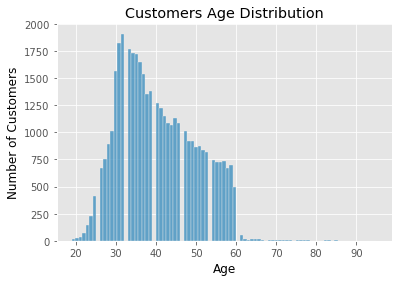

In [16]:
sns.histplot(x = "age", data = data)
plt.title("Customers Age Distribution")
plt.ylabel("Number of Customers", color = "k")
plt.xlabel("Age",color = "k")

**CONVERTING AGE ( INT64 ) COLUMN INTO CATEGORICAL FEATURES.**

**I will create a new feature based on an existing age column. It will divide the age column into different categories to 
better understand the relationship between age and the subscription rates.**

In [17]:
age_ranges = [data["age"].min(), 30,40,50,60, data["age"].max()]

In [18]:
age_ranges

[19, 30, 40, 50, 60, 95]

In [20]:
age_labels = ["twenties", "thirties", "fourties", "fifties", "older"]

**I will store original data as untouched. Since I will do many manupilations, conversions etc. on the dataset, I will keep it
to see how we changed the original dataset at the end.**

In [21]:
data2 = data.copy()

In [22]:
data2["age_"] = pd.cut(data2["age"], bins = age_ranges, labels = age_labels)

In [23]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,fifties
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,fourties
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,thirties
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,fourties
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,thirties


**Does age affect paying for term deposit ? I will do mapping on "y" column to convert it to 1's and 0's for better 
numerical computations and try to answer this question.**

In [24]:
data2["target"] = data2["y"].map({"no" : 0, "yes" : 1})

In [25]:
data2.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_,target
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no,fifties,0
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes,twenties,1
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes,fifties,1
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no,thirties,0
39999,38,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no,thirties,0


In [26]:
data2.groupby("age_")["target"].mean()

age_
twenties    0.102454
thirties    0.069924
fourties    0.060594
fifties     0.060536
older       0.388889
Name: target, dtype: float64

In [27]:
s = data2.groupby("age_")["target"].mean()

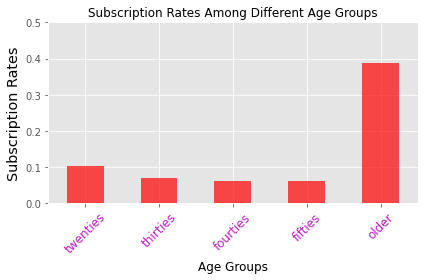

In [28]:
s.plot(kind = "bar", color = "r", alpha = 0.7)
plt.ylim(0,0.5)
plt.xlabel("Age Groups", color = "k", fontsize = "large")
plt.ylabel("Subscription Rates", color = "k", fontsize = "x-large")
plt.xticks(rotation = 45, color = "m", alpha = 0.9, fontsize = "large")
plt.title("Subscription Rates Among Different Age Groups", fontsize = "large")
plt.tight_layout()


**It can be seen from the graph that age groups affect subscription rates differently. Especially people older than 60 tend to 
subscribe more. It shows the percentage so we can think it as lesser older people can have higher percentage too but still it 
can be a good feature for our model to predict whether our customer will subscribe or not based on looking the age category 
of the customer.**

**Lets check how the average yearly balance of the customers distributed ?**

Text(0.5, 1.0, 'Yearly Balance Distribution')

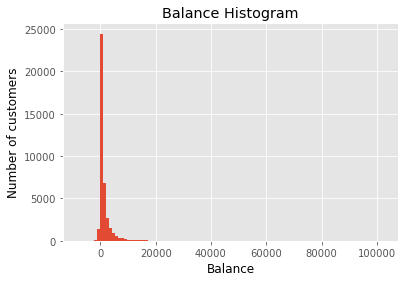

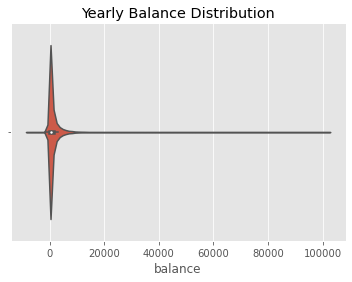

In [29]:
plt.subplots()
data["balance"].hist(bins = 100)
plt.xlabel("Balance", color = "k")
plt.ylabel("Number of customers", color = "k")
plt.title("Balance Histogram")
plt.subplots()
sns.violinplot(x = data2["balance"])
plt.title("Yearly Balance Distribution")

**This is expected since "balance" column has very high variance value as we seen from the .describe() method. I will not
remove outliers since it looks like I may lose many data points that can be significantly affecting subscription status. However,to handle this, I will choose to scale this column such that maximum value will be 1 and minimum value will be 0.**

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler(feature_range = (0,1))

In [32]:
data2["balance_scale"] = scaler.fit_transform(np.array(data["balance"]).reshape(-1,1))

In [33]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,age_,target,balance_scale
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,fifties,0,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,fourties,0,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,thirties,0,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,fourties,0,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,thirties,0,0.072812


**Lets check the "day" attribute.**

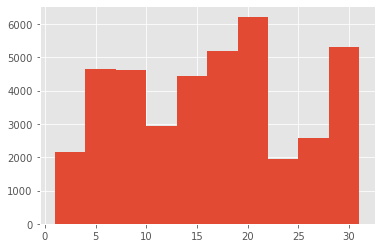

In [34]:
data2["day"].hist()

In [35]:
s2 = data2.groupby("day")["target"].mean()

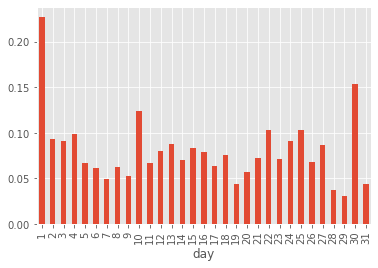

In [36]:
s2.plot(kind = "bar")

**It looks like day of the month column has no significant affect on subscription rates. I will choose to drop this column in 
order to reduce dimension of the dataset before applying to machine learning algorithms.**

In [37]:
data2 = data2.drop("day", axis = 1)

In [38]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,y,age_,target,balance_scale
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,no,fifties,0,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,no,fourties,0,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,no,thirties,0,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,no,fourties,0,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,no,thirties,0,0.072812


**Lets check the "duration" attribute.**

Text(0, 0.5, 'Number of customers')

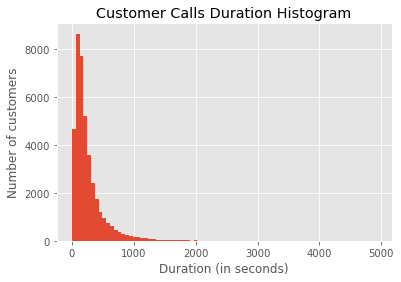

In [39]:
data["duration"].hist(bins = 80)
plt.title("Customer Calls Duration Histogram")
plt.xlabel("Duration (in seconds)")
plt.ylabel("Number of customers")

**Duration column also has high variance so it needs to be scaled too.**

In [40]:
print("Duration column \nMean {} \nVariance {}".format(data2["duration"].mean(), data2["duration"].var() ))

Duration column 
Mean 254.8243 
Variance 67270.98035401884


In [41]:
data2["duration_scaled"] = scaler.fit_transform(np.array(data2["duration"]).reshape(-1,1))

In [42]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,y,age_,target,balance_scale,duration_scaled
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,no,fifties,0,0.092259,0.053070
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,no,fourties,0,0.073067,0.030704
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,no,thirties,0,0.072822,0.015453
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,no,fourties,0,0.086476,0.018707
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,no,thirties,0,0.072812,0.040260


**Lets check the "campaign" attribute.**

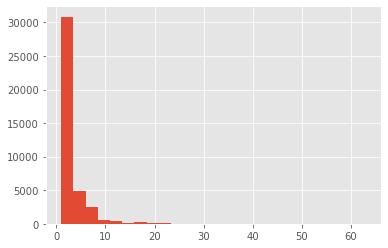

In [43]:
data2["campaign"].hist(bins = 25)

In [44]:
data2["campaign_scaled"] = scaler.fit_transform(np.array(data2["campaign"]).reshape(-1,1))

In [45]:
data2.tail()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,y,age_,target,balance_scale,duration_scaled,campaign_scaled
39995,53,technician,married,tertiary,no,395,no,no,cellular,jun,107,1,no,fifties,0,0.076390,0.021757,0.000000
39996,30,management,single,tertiary,no,3340,no,no,cellular,jun,238,3,yes,twenties,1,0.103127,0.048394,0.032258
39997,54,admin,divorced,secondary,no,200,no,no,cellular,jun,170,1,yes,fifties,1,0.074619,0.034567,0.000000
39998,34,management,married,tertiary,no,1047,no,no,cellular,jun,342,1,no,thirties,0,0.082309,0.069540,0.000000
39999,38,technician,married,secondary,no,1442,yes,no,cellular,jun,113,1,no,thirties,0,0.085895,0.022977,0.000000


**Now, we handled numerical columns.Lets check columns with object data types.**

In [46]:
for col in data.columns:
    if data[col].dtype == "object":
        print(col)
        print(data[col].unique(), "\n")

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 

marital
['married' 'single' 'divorced'] 

education
['tertiary' 'secondary' 'unknown' 'primary'] 

default
['no' 'yes'] 

housing
['yes' 'no'] 

loan
['no' 'yes'] 

contact
['unknown' 'cellular' 'telephone'] 

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr'] 

y
['no' 'yes'] 



**It looks like object types are categories since there are few unique values and they seem to have familiarities 
with each other. In order to increase efficiency on data operations we can convert them into category data type.
This can significantly reduces memory usage. Thus, it also affects the speed of operations etc.**

**Lets see how converting object type to category can dramatically reduce memory usage.**

In [47]:
data["job"].memory_usage(deep = True)

1538591

In [48]:
data["job_"] = data["job"].astype("category")

In [49]:
data["job_"].memory_usage(deep = True)

40715

In [50]:
data.drop("job_", axis = 1, inplace = True)

**As we can see, memory usage dropped from 1.538.591 to only 40.715. It means %97 decrease in the memory usage just for one 
attribute. If we use that method for columns seem to have categories, we may end up with huge benefits in terms of memory usage.**

**I will show how memory usage dropped after converting data types to categories. .info() method also indicates the memory
usage. I will check it before and after conversion.**

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.9+ MB


In [52]:
data3 = data.copy()

In [53]:
categories = ["job", "marital", "education", "contact", "month"]

In [54]:
for category in categories:
    data3[category] = data3[category].astype("category")

In [55]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        40000 non-null  int64   
 1   job        40000 non-null  category
 2   marital    40000 non-null  category
 3   education  40000 non-null  category
 4   default    40000 non-null  object  
 5   balance    40000 non-null  int64   
 6   housing    40000 non-null  object  
 7   loan       40000 non-null  object  
 8   contact    40000 non-null  category
 9   day        40000 non-null  int64   
 10  month      40000 non-null  category
 11  duration   40000 non-null  int64   
 12  campaign   40000 non-null  int64   
 13  y          40000 non-null  object  
dtypes: category(5), int64(5), object(4)
memory usage: 2.3+ MB


**As we can see, It dropped from 2.9 MB to 2.3 MB. It means %20 decrease in total memory usage which can be very beneficial for
training and other data operations. If we want to increase scalability of  our model we need to take care of data types 
correctly.**

In [56]:
del data3

**Lets convert object types to category type.**

In [57]:
categories = ["job", "marital", "education", "contact", "month"]

In [58]:
for category in categories:
    data2[category] = data2[category].astype("category")

In [59]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              40000 non-null  int64   
 1   job              40000 non-null  category
 2   marital          40000 non-null  category
 3   education        40000 non-null  category
 4   default          40000 non-null  object  
 5   balance          40000 non-null  int64   
 6   housing          40000 non-null  object  
 7   loan             40000 non-null  object  
 8   contact          40000 non-null  category
 9   month            40000 non-null  category
 10  duration         40000 non-null  int64   
 11  campaign         40000 non-null  int64   
 12  y                40000 non-null  object  
 13  age_             39988 non-null  category
 14  target           40000 non-null  int64   
 15  balance_scale    40000 non-null  float64 
 16  duration_scaled  40000 non-null  float64

**Now, remaining object typed columns include values "yes" and "no" which means that we can convert them to 1's and 0's. Lets do this.**

In [60]:
binary_columns = ["default", "housing","loan","y"]

In [61]:
for col in binary_columns:
    data2[col] = data2[col].map({"no" : 0 , "yes" : 1})

In [62]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,y,age_,target,balance_scale,duration_scaled,campaign_scaled
0,58,management,married,tertiary,0,2143,1,0,unknown,may,261,1,0,fifties,0,0.092259,0.053070,0.0
1,44,technician,single,secondary,0,29,1,0,unknown,may,151,1,0,fourties,0,0.073067,0.030704,0.0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,may,76,1,0,thirties,0,0.072822,0.015453,0.0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,may,92,1,0,fourties,0,0.086476,0.018707,0.0
4,33,unknown,single,unknown,0,1,0,0,unknown,may,198,1,0,thirties,0,0.072812,0.040260,0.0


In [63]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              40000 non-null  int64   
 1   job              40000 non-null  category
 2   marital          40000 non-null  category
 3   education        40000 non-null  category
 4   default          40000 non-null  int64   
 5   balance          40000 non-null  int64   
 6   housing          40000 non-null  int64   
 7   loan             40000 non-null  int64   
 8   contact          40000 non-null  category
 9   month            40000 non-null  category
 10  duration         40000 non-null  int64   
 11  campaign         40000 non-null  int64   
 12  y                40000 non-null  int64   
 13  age_             39988 non-null  category
 14  target           40000 non-null  int64   
 15  balance_scale    40000 non-null  float64 
 16  duration_scaled  40000 non-null  float64

**Lets check the "month" column and its affect on the subscription rates. After checking, I will decide whether to drop this
column or not.**

In [64]:
s4 = data2.groupby("month")["target"].mean()

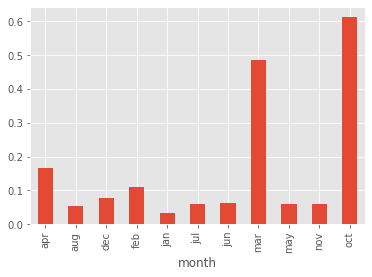

In [65]:
s4.plot(kind = "bar")

**It looks like month column has no significant affect on the subscription rates. Since it has 11 categories inside,if we try to
one-hot encode the categories we will get 11 attributes which will increase the dimensionality dramatically and affect the
model performance. I decide to remove that column due to this reason.**

In [66]:
data2 = data2.drop("month", axis = 1)

**Now lets see the original data first and then the manupilated data to see which columns to drop, which columns to one-hot 
encode etc.**

In [67]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [68]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,y,age_,target,balance_scale,duration_scaled,campaign_scaled
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,0,fifties,0,0.092259,0.053070,0.0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,0,fourties,0,0.073067,0.030704,0.0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,0,thirties,0,0.072822,0.015453,0.0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,0,fourties,0,0.086476,0.018707,0.0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,0,thirties,0,0.072812,0.040260,0.0


**Does job affect the subscription rates ?**

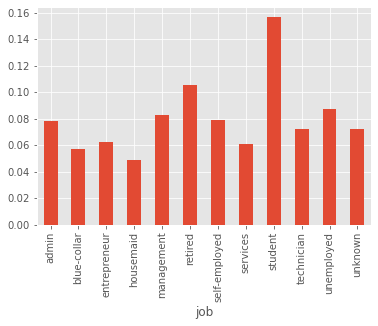

In [69]:
data2.groupby("job")["target"].mean().plot(kind = "bar")

**It is indeed affecting the subscription rates, we must keep this feature for our model although it has many categories and
one-hot encoding will return back many dimensions. It will be a fair trade-off.**

**Does marital status affecting subscription rates ?**

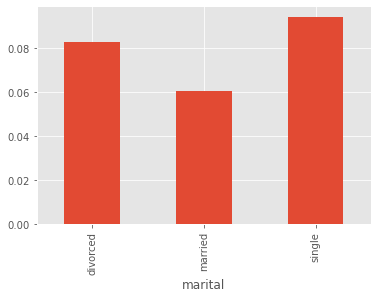

In [70]:
data2.groupby("marital")["target"].mean().plot(kind = "bar")

**It has only 3 different categories and each category seems to be affecting subscription rates. I will keep this column in the 
feature space too.**

**Does education affecting subscription rates?**

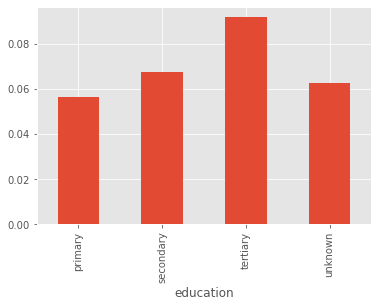

In [71]:
data2.groupby("education")["target"].mean().plot(kind = "bar")

**It is indeed affecting subscription rates and again it has small number of categories. I decide to keep this column as well.**

**Does contact affecting subscription rates?**

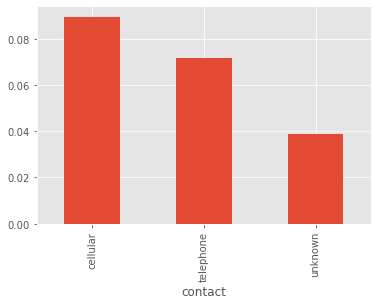

In [72]:
data2.groupby("contact")["target"].mean().plot(kind = "bar")

**It is indeed affecting. I decided to keep this column as well.**

In [73]:
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,y,age_,target,balance_scale,duration_scaled,campaign_scaled
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,0,fifties,0,0.092259,0.053070,0.0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,0,fourties,0,0.073067,0.030704,0.0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,0,thirties,0,0.072822,0.015453,0.0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,0,fourties,0,0.086476,0.018707,0.0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,0,thirties,0,0.072812,0.040260,0.0


**There are some columns created based on existing ones. In terms of data integrity we need to drop some columns.**

In [74]:
data2 = data2.drop(["age","balance", "duration", "campaign","target"], axis = 1)

In [75]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   job              40000 non-null  category
 1   marital          40000 non-null  category
 2   education        40000 non-null  category
 3   default          40000 non-null  int64   
 4   housing          40000 non-null  int64   
 5   loan             40000 non-null  int64   
 6   contact          40000 non-null  category
 7   y                40000 non-null  int64   
 8   age_             39988 non-null  category
 9   balance_scale    40000 non-null  float64 
 10  duration_scaled  40000 non-null  float64 
 11  campaign_scaled  40000 non-null  float64 
dtypes: category(5), float64(3), int64(4)
memory usage: 2.3 MB


**Lets do a final check to see the differences between the original data and the one we manupilated for our purposes.**

In [76]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [77]:
data2.head()

,job,marital,education,default,housing,loan,contact,y,age_,balance_scale,duration_scaled,campaign_scaled
0,management,married,tertiary,0,1,0,unknown,0,fifties,0.092259,0.053070,0.0
1,technician,single,secondary,0,1,0,unknown,0,fourties,0.073067,0.030704,0.0
2,entrepreneur,married,secondary,0,1,1,unknown,0,thirties,0.072822,0.015453,0.0
3,blue-collar,married,unknown,0,1,0,unknown,0,fourties,0.086476,0.018707,0.0
4,unknown,single,unknown,0,0,0,unknown,0,thirties,0.072812,0.040260,0.0


**One final step remained for machine learning algorithms which is to convert categorical features into numerical values. It is
vital since machine learning algorithms can not interpret categories, they can interpret numbers. There are two ways to ensure
this conversion :**

    In scikit-learn : LabelEncoder()
    In pandas : pd.get_dummies()
**I will use pd.get_dummies() function here to convert categories into one-hot encoded labels.**

### ONE-HOT ENCODING CATEGORICAL FEATURES

In [78]:
data2.shape

(40000, 12)

In [79]:
data2 = pd.get_dummies(data2)

In [80]:
data2.shape

(40000, 34)

In [81]:
data2.head()

,default,housing,loan,y,balance_scale,duration_scaled,campaign_scaled,job_admin,job_blue-collar,job_entrepreneur,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,age__twenties,age__thirties,age__fourties,age__fifties,age__older
0,0,1,0,0,0.092259,0.053070,0.0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0.073067,0.030704,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0.072822,0.015453,0.0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0.086476,0.018707,0.0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0,0.072812,0.040260,0.0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


**As we can see, number of attributes significantly increased, I decided to drop some of the columns before just to make sure that
the number of attributes is not increasing dramatically. Remaining features are significantly affecting subscription rates, I 
cross checked it via visualizations. Now, I can go further and split feature space and target variable for training purposes.**

**FEATURES**

In [82]:
X = data2.drop("y", axis = 1)

In [83]:
X.shape

(40000, 33)

**Target Variable**

In [84]:
y = data2["y"]

In [85]:
y.shape

(40000,)

### BENCHMARK FOR OUR MODEL 

**Lets find what percentages of our customers accepted to pay for term deposit. This can also be used as a benchmark for our 
model.**

In [86]:
data["y"].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [87]:
percentages = data["y"].value_counts() / len(data["y"])

In [88]:
percentages

no     0.9276
yes    0.0724
Name: y, dtype: float64

In [89]:
percentages.index

Index(['no', 'yes'], dtype='object')

In [90]:
percentages.values

array([0.9276, 0.0724])

Text(0.5, 1.0, 'Percentages of Customers Subscription Status')

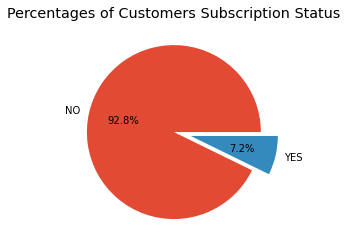

In [91]:
plt.pie(percentages, labels = percentages.index.str.upper(), autopct='%1.1f%%', explode = (0, 0.2))
plt.title("Percentages of Customers Subscription Status")

**From above graph we can conclude that %92.8 percent of the customers decided not to subscribe for term deposit whereas 
%7.2 percent of customers decided to subscribe. It can also be used as a benchmark for our model since if our model predict "NO"
for all the customers it can achieve %92.8 accuracy ! This looks pretty successfull but our model can not manage to predict 
customers who will most likely to subscribe so a high accuracy score could be deceiving. Other metrics such as F1 Score 
can be used for better evaluations.**

## MODEL SELECTION 

**I will try different classifiers and then decide which one to use based on their cross validation accuracy scores.After picking the model, I will use GridSearchCV to do hyper-parameter tuning for creating the best estimator.**

**Tree Based Models -- Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. I will also try different ensemble methods here to combat with these drawbacks that tree based models have.**

**By looking at the guide at scikit-learn library it is recommended to use LinearSVC for classification tasks with lesser than
50k samples. Since our dataset consists of 40k samples, I will also try this algorithm and then find which one is performing 
better by looking at their accuracy scores on cross-validations.**

**I will also monitor the time that algorithm takes to make predictions since if we want to scale our machine learning solution
for bigger datasets we need to make sure that our algorithm working fast enough to make correct predictions. It is an important
criteria when choosing models.**

**A Single DecisionTreeClassifier**

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
tree = DecisionTreeClassifier(random_state = 5)

### cross-val-score

**Scikit-learn library provides a model selection technique which is "cross_val_score". It simply takes the model and data.Then, it
performs cross validations according to the given number as an argument and calculates scores for each fold. Scoring method
can be changed depending on which performance indicator we would like to use. It is pretty handy method for measuring models
performance on a given model and dataset. In this project, I will try to achieve at least %81 accuracy on 5folds cross validation
technique. Here I will specify the models, the dataset and 5folds cross validations to the function and it will return back 
the scores of each fold stored in a numpy array. I will then calculate the mean of the scores for each fold to find average
accuracy scores of each model.**

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
score_tree = cross_val_score(tree, X, y, scoring = "accuracy", cv = 5)

In [96]:
score_tree

array([0.919875, 0.896625, 0.876125, 0.86825 , 0.875   ])

In [97]:
np.mean(score_tree)

0.887175

In [ ]:
# %timeit cross_val_score(tree, X, y, scoring = "accuracy", cv = 5)

#### FEATURE IMPORTANCES -- What are the most important 10 features in our dataset ?
#### Lets find it via DecisionTreeClassifier built in method     ".feature_importances_"

In [98]:
tree.fit(X,y)

DecisionTreeClassifier(random_state=5)

In [99]:
tree.feature_importances_

array([0.00307188, 0.01529674, 0.01549047, 0.21980864, 0.43925938,
       0.04995586, 0.01332337, 0.01369994, 0.00541983, 0.00365511,
       0.01346557, 0.0066572 , 0.00638559, 0.00978554, 0.00510095,
       0.01392816, 0.00506853, 0.0020823 , 0.00969323, 0.01317501,
       0.00815393, 0.00747152, 0.01465122, 0.01337524, 0.00481163,
       0.00893969, 0.00353689, 0.00924824, 0.0142089 , 0.01851434,
       0.01505514, 0.00808335, 0.0096266 ])

In [100]:
assert X.shape[1] == len(tree.feature_importances_)

In [101]:
X.head()

,default,housing,loan,balance_scale,duration_scaled,campaign_scaled,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,age__twenties,age__thirties,age__fourties,age__fifties,age__older
0,0,1,0,0.092259,0.053070,0.0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0.073067,0.030704,0.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0.072822,0.015453,0.0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,1,0,0.086476,0.018707,0.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0.072812,0.040260,0.0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [102]:
feature_importance = tree.feature_importances_

In [103]:
important_features = pd.Series(feature_importance)

In [104]:
top_10_features = important_features.nlargest(10)

In [105]:
top_10_features

4     0.439259
3     0.219809
5     0.049956
29    0.018514
2     0.015490
1     0.015297
30    0.015055
22    0.014651
28    0.014209
15    0.013928
dtype: float64

In [106]:
for index in top_10_features.index:
    print(X.columns[index])

duration_scaled
balance_scale
campaign_scaled
age__thirties
loan
housing
age__fourties
education_secondary
age__twenties
job_technician


In [107]:
important_attributes = []

In [108]:
for index in top_10_features.index:
    important_attributes.append(X.columns[index])

In [109]:
important_attributes

['duration_scaled',
 'balance_scale',
 'campaign_scaled',
 'age__thirties',
 'loan',
 'housing',
 'age__fourties',
 'education_secondary',
 'age__twenties',
 'job_technician']

In [110]:
features = pd.Series(important_attributes)

In [111]:
df = pd.DataFrame({"features" : features.values, "importance" : top_10_features.values})

In [112]:
df

,features,importance
0,duration_scaled,0.439259
1,balance_scale,0.219809
2,campaign_scaled,0.049956
3,age__thirties,0.018514
4,loan,0.015490
5,housing,0.015297
6,age__fourties,0.015055
7,education_secondary,0.014651
8,age__twenties,0.014209
9,job_technician,0.013928


In [113]:
df2 = df.set_index("features")

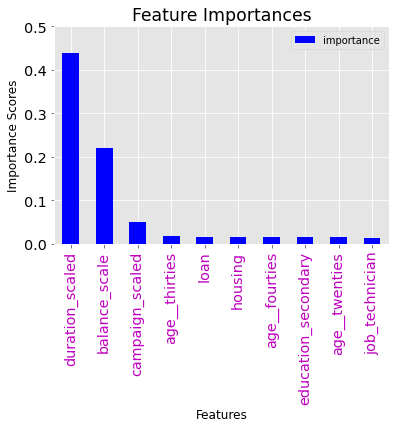

In [114]:
df2.plot(kind= "bar", color = "b")
plt.xlabel("Features", color = "k")
plt.ylabel("Importance Scores", color = "k")
plt.title("Feature Importances", color = "k", fontsize = "xx-large")
plt.xticks(rotation = 90, fontsize = "x-large", color = "m")
plt.yticks(color = "k", fontsize = "x-large")
plt.ylim(0, 0.5)
plt.margins(0.5)

**As we can see from the feature importances matrix,"duration_scaled" and "balance_scale" attributes are the most important 
features for predicting whether a customer will subscribe or not. This is reasonable since if a customer interested in paying for term deposit, he/she wants to gather more information when call made which leads to increase in the duration of calls. In addition to this, it is important to have enough money to invest so balance is another factor affecting decisions of the customers for subscriptions.**

**LOGISTIC REGRESSION ( Although its name includes regression it is used for classification tasks.)**

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
logreg = LogisticRegression(random_state = 10, max_iter = 500)

In [117]:
score_logreg = cross_val_score(logreg, X, y, scoring = "accuracy", cv = 5)

In [118]:
score_logreg

array([0.932375, 0.936625, 0.930625, 0.921875, 0.9255  ])

In [119]:
np.mean(score_logreg)

0.9294

In [ ]:
# %timeit cross_val_score(logreg, X, y, scoring = "accuracy", cv = 5)

**Linear Support Vector Classifier (SVC) -- Recommended by scikit-learn for data has lesser than 50k samples.**

In [120]:
from sklearn.svm import LinearSVC

In [121]:
clf = LinearSVC(random_state = 22)

In [122]:
score_svc = cross_val_score(clf, X, y, scoring = "accuracy", cv = 5)

In [123]:
score_svc

array([0.932625, 0.9345  , 0.932   , 0.92225 , 0.924625])

In [124]:
np.mean(score_svc)

0.9292

In [ ]:
# %timeit cross_val_score(clf, X, y, scoring = "accuracy", cv = 5)

**ENSEMBLE METHODS**

**RandomForestClassifier**

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
forest = RandomForestClassifier(random_state = 44)

In [127]:
forest_score = cross_val_score(forest, X, y, scoring = "accuracy", cv = 5)

In [128]:
forest_score

array([0.930875, 0.922625, 0.9165  , 0.9115  , 0.92025 ])

In [129]:
np.mean(forest_score)

0.92035

In [ ]:
# %timeit cross_val_score(forest, X, y, scoring = "accuracy", cv = 5)

**GradientBoosting Classifier**

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
grad_clf = GradientBoostingClassifier(random_state = 66)

In [132]:
grad_scores = cross_val_score(grad_clf, X, y, scoring = "accuracy", cv = 5)

In [133]:
grad_scores

array([0.932875, 0.93    , 0.923875, 0.90975 , 0.924375])

In [134]:
np.mean(grad_scores)

0.924175

In [ ]:
# %timeit cross_val_score(grad_clf, X, y, scoring = "accuracy", cv = 5)

**ExtraTreesClassifier**

In [135]:
from sklearn.ensemble import ExtraTreesClassifier 

In [136]:
extra_tree = ExtraTreesClassifier(random_state = 22)

In [137]:
extra_scores = cross_val_score(extra_tree, X, y, scoring = "accuracy", cv = 5)

In [138]:
extra_scores 

array([0.929125, 0.919   , 0.91025 , 0.90975 , 0.908875])

In [139]:
np.mean(extra_scores)

0.9154

In [ ]:
# %timeit cross_val_score(extra_tree, X, y, scoring = "accuracy", cv = 5)

**AdaBoostClassifier**

In [140]:
from sklearn.ensemble import AdaBoostClassifier

In [141]:
ada = AdaBoostClassifier(n_estimators = 100, random_state = 7)

In [142]:
ada_score = cross_val_score(ada, X, y, scoring = "accuracy", cv = 5)

In [143]:
ada_score

array([0.932625, 0.94225 , 0.921   , 0.907375, 0.9215  ])

In [144]:
np.mean(ada_score)

0.9249500000000002

In [ ]:
# %timeit cross_val_score(ada, X, y, scoring = "accuracy", cv = 5)

**Bagging Classifier**

In [145]:
from sklearn.ensemble import BaggingClassifier

In [146]:
bag = BaggingClassifier(random_state = 77)

In [147]:
bag_score = cross_val_score(bag, X, y, scoring = "accuracy", cv = 5)

In [148]:
np.mean(bag_score)

0.9175000000000001

In [ ]:
# %timeit cross_val_score(bag, X, y, scoring = "accuracy", cv = 5)

### MODEL COMPARISON

In [149]:
training_results = pd.DataFrame({"model_name" : 
                                 ["Decision_Tree", "Logistic_Regression", "LinearSVC", "RandomForestClassifier",
                            "GradientBoostingClassifier", "ExtraTreesClassifier", "AdaBoostClassifier", "BaggingClassifier"],
                            "is_ensemble" : [False, False, False, True, True, True, True, True],
                            "model_average_accuracy_5foldsCV" : [0.8871, 0.9294,0.9292, 0.9203,0.9241, 0.9154, 0.9249,0.9175],
                            "time_elapsed(in_seconds)" : [1.26, 3.87, 2.33, 21.3, 31.8,19.3,20.9,8.6]})

In [150]:
training_results

,model_name,is_ensemble,model_average_accuracy_5foldsCV,time_elapsed(in_seconds)
0,Decision_Tree,False,0.8871,1.26
1,Logistic_Regression,False,0.9294,3.87
2,LinearSVC,False,0.9292,2.33
3,RandomForestClassifier,True,0.9203,21.30
4,GradientBoostingClassifier,True,0.9241,31.80
5,ExtraTreesClassifier,True,0.9154,19.30
6,AdaBoostClassifier,True,0.9249,20.90
7,BaggingClassifier,True,0.9175,8.60


In [151]:
training_results.describe()

,model_average_accuracy_5foldsCV,time_elapsed(in_seconds)
count,8.000000,8.000000
mean,0.918488,13.670000
std,0.013656,11.181823
min,0.887100,1.260000
25%,0.916975,3.485000
50%,0.922200,13.950000
75%,0.925975,21.000000
max,0.929400,31.800000


**When we look at the training results, mean accuracy for 8 different classifiers is 0.918 whereas maximum accuracy is 0.9294.
Minimum accuracy score is 0.887 and mean time elapsed for training these models is 13.6 seconds. Note that these are the numbers
for classifiers with default arguments evaluated on 5 fold cross validation technique. I will further pick one of them and 
do hyperparameter tuning for better accuracy scores. This was performed because I wanted to see how each classifier performs
on my dataset.**

Text(0.5, 1.0, 'Model Comparison based on their accuracy scores')

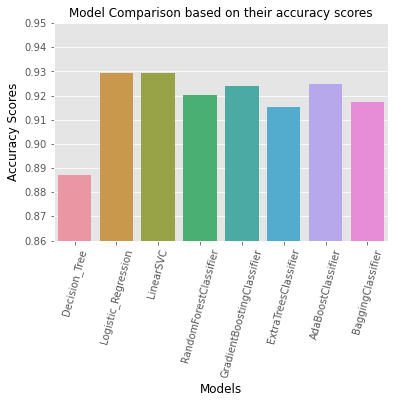

In [152]:
sns.barplot(x = "model_name", y = "model_average_accuracy_5foldsCV",data = training_results)
plt.xticks(rotation = 75)
plt.ylabel("Accuracy Scores", color = "k", fontsize = "large")
plt.xlabel("Models", color = "k", fontsize = "large")
plt.ylim(0.86,0.95)
plt.title("Model Comparison based on their accuracy scores", fontsize = "large", color = "k")

**From the graph above, best performing models are Logistic Regression, LinearSVC, GradientBoosting and AdaBoostClassifier.
It is important to note that LogisticRegression and LinearSVC are not ensemble methods however they performed pretty well
and they manage to make better predictions than other ensemble methods. I will pick 3 of the models above and do hyperparameter
tuning for these models. My choices are LogisticRegression, LinearSVC and AdaBoostClassifier. Lets see what will 
happen after doing GridSearch to find best hyperparameter values.**

**Before doing that I will compare the performances of ensemble methods and other classifiers in terms of 
time elapsed during training and accuracy scores**

Text(0.5, 1.0, 'Time Difference between models')

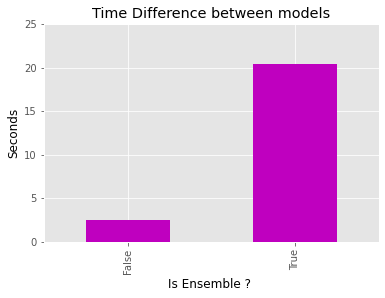

In [153]:
training_results.groupby("is_ensemble")["time_elapsed(in_seconds)"].mean().plot(kind = "bar", color = "m")
plt.ylim(0,25)
plt.ylabel("Seconds", color = "k")
plt.xlabel("Is Ensemble ? ", color = "k", fontsize = "large")
plt.title("Time Difference between models")

**As we can see, ensemble methods take significantly more time to train. In many cases, ensemble methods use at least 100 single
estimators and then they make predictions based on those single estimators. This is the main reason why ensemble methods can 
achieve greater accuracy on the other hand take more time to train. There is trade-off between time and accuracy while deciding
which method to use. If we concern scalability we must aware of this.**

**Does ensemble methods have higher success on predictions ?**

Text(0.5, 1.0, 'Accuracy Difference between models')

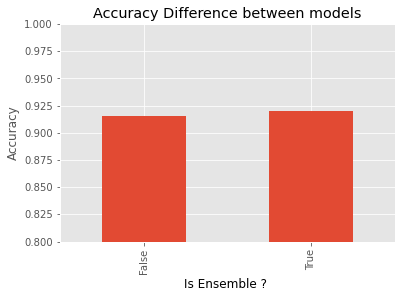

In [154]:
training_results.groupby("is_ensemble")["model_average_accuracy_5foldsCV"].mean().plot(kind = "bar")
plt.ylim(0.8,1)
plt.ylabel("Accuracy")
plt.xlabel("Is Ensemble ? ", color = "k", fontsize = "large")
plt.title("Accuracy Difference between models")

**As we can see, ensemble methods are slightly better at prediction however as I mentioned earlier they take significant time to
train.**

## HYPERPARAMETER TUNING 

**Logistic Regression**

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
parameters_logreg = {"C": [1.0,1.5,2.0,3.0,4.0,5.0,6.0,7.0], "solver" : ["liblinear", "lbfgs"]}

In [157]:
logreg = LogisticRegression(random_state = 10, max_iter = 800)

In [158]:
grid_logreg = GridSearchCV(logreg, parameters_logreg,cv = 5)

In [159]:
grid_logreg.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=800, random_state=10),
             param_grid={'C': [1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
                         'solver': ['liblinear', 'lbfgs']})

In [160]:
grid_logreg.best_score_

0.9299250000000001

In [161]:
grid_logreg.best_estimator_

LogisticRegression(C=4.0, max_iter=800, random_state=10, solver='liblinear')

**LinearSVC**

In [162]:
parameters_svc = { "C" : [1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0]}

In [163]:
svc = LinearSVC(random_state = 26, max_iter = 1000, dual = False)

In [164]:
grid_svc = GridSearchCV(svc, parameters_svc, cv = 5)

In [165]:
grid_svc.fit(X,y)

GridSearchCV(cv=5, estimator=LinearSVC(dual=False, random_state=26),
             param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]})

In [166]:
grid_svc.best_score_

0.9292

In [167]:
grid_svc.best_estimator_

LinearSVC(dual=False, random_state=26)

**DecisionTreeClassifier**

**Most of the classifiers above are ensemble methods which give us advantages to combat against overfitting and improving model
accuracy at the same time. However, I used only default estimators to traing those ensembles in order to just check which one 
is performing better in that scenario. Now, I am going to tune the hyperparameters of a single DecisionTreeClassifier to find
best estimator which I am going to use it in the ensemble method I choose.**

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
parameters = {"criterion" : ["gini", "entropy"], "splitter" : ["best", "random"], "max_depth" : [2,4,6,8,10,12],
                 "min_samples_split":[0.2,0.4,0.6,0.8]}

In [170]:
decision_tree = DecisionTreeClassifier(random_state = 33)

In [171]:
grid_object = GridSearchCV(decision_tree, parameters, cv = 5)

In [172]:
grid_object.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=33),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [0.2, 0.4, 0.6, 0.8],
                         'splitter': ['best', 'random']})

In [173]:
grid_object.best_score_

0.928375

**As we can see, doing hyperparameter tuning we managed to improve the accuracy score of a single tree from %88 to %92.8. This
is the main reaason for doing hyperparameter tuning. We simply take advantage of using correct parameters for our model.**

In [174]:
grid_object.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=0.4, random_state=33,
                       splitter='random')

In [175]:
base_tree = DecisionTreeClassifier(max_depth = 6, min_samples_split = 0.4, random_state = 43, splitter = "random")

In [176]:
from sklearn.ensemble import AdaBoostClassifier

In [177]:
ada_tuned = AdaBoostClassifier(base_estimator = base_tree, random_state = 7)

In [178]:
parameters = {"n_estimators" : [50,100,150,200,300]}

In [179]:
grid_ada = GridSearchCV(ada_tuned, parameters, cv = 5)

In [180]:
grid_ada.fit(X,y)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                                                min_samples_split=0.4,
                                                                                random_state=43,
                                                                                splitter='random'),
                                          random_state=7),
             param_grid={'n_estimators': [50, 100, 150, 200, 300]})

In [181]:
grid_ada.best_score_

0.92125

In [182]:
grid_ada.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         min_samples_split=0.4,
                                                         random_state=43,
                                                         splitter='random'),
                   random_state=7)

### PICKLING BEST MODEL / PERSISTING MODEL

**I prefer LinearSVC model since it has significant advantages over other models such that it is faster than ensemble methods 
( up to 10 times ) and it has one of the highest accuracy score among others ( %92.92 accuracy over 5fold cross validation -- only logistic regression is higher with %92.99 ) ). It is also
recommended by scikit-learn itself for classification tasks with dataset lesser than 50k samples. These 3 reasons shaped my 
opinion while choosing LinearSVC as a robust model for this project.**

In [183]:
svc = LinearSVC(random_state = 26, max_iter = 1000, dual = False)

In [184]:
scores_svc = cross_val_score(svc, X, y, cv = 5)

In [185]:
scores_svc

array([0.932625, 0.9345  , 0.932   , 0.92225 , 0.924625])

In [186]:
np.mean(scores_svc)

0.9292

#### PERSISTING MODEL 

In [187]:
import pickle 

In [188]:
pickle.dump(svc, open("%92.92accurateSVClassifier.pickle","wb"))

#### LOADING MODEL

In [189]:
model = pickle.load(open("%92.92accurateSVClassifier.pickle","rb"))

In [190]:
model

LinearSVC(dual=False, random_state=26)

In [191]:
svc_score = cross_val_score(model, X, y, cv = 5)

In [192]:
svc_score

array([0.932625, 0.9345  , 0.932   , 0.92225 , 0.924625])

In [193]:
np.mean(svc_score)

0.9292

## CUSTOMER SEGMENTATION 

**During the preprocessing and training steps, I looked at different attributes and their impact on customer subscriptions.
One of the key observation was determining feature importances of the model. It basically tells us some features are more 
decisive than others. I will recall that graph again to see which features are dominant in that context. While doing EDA, there
were some key observations about customers such that age group was a big determiner, their balance records also a big determiner
in subscriptions. I will filter the data in order to create segments that have high customer subscription rates so that clients
can now understand which features are more important than others while looking customer information.**

**Lets recall the feature importance graph.**

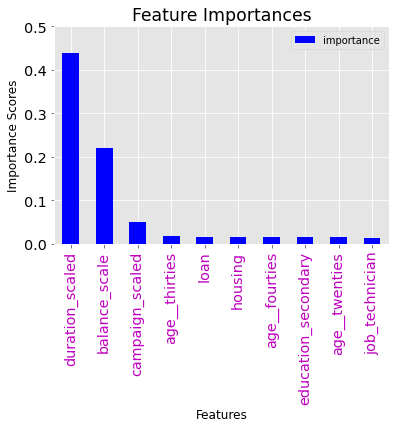

In [194]:
df2.plot(kind= "bar", color = "b")
plt.xlabel("Features", color = "k")
plt.ylabel("Importance Scores", color = "k")
plt.title("Feature Importances", color = "k", fontsize = "xx-large")
plt.xticks(rotation = 90, fontsize = "x-large", color = "m")
plt.yticks(color = "k", fontsize = "x-large")
plt.ylim(0, 0.5)
plt.margins(0.5)

**It can be seen from the graph that duration of calls and average yearly balance of the customers are 2 most important features
when determining subscriptions. There are also other factors such as age groups, loans etc.**

**Lets filter the data to create segments. I will again keep original dataset as untouched.**

In [195]:
data6 = data.copy()

In [196]:
data6["target"] = data6["y"].map({"no" : 0, "yes" : 1})

In [197]:
data6.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,0


### AGE

In [198]:
age_ranges = [data["age"].min(), 30,40,50,60, data["age"].max()]

In [199]:
age_labels = ["twenties", "thirties", "fourties", "fifties", "older"]

In [200]:
data6["age_"] = pd.cut(data6["age"], bins = age_ranges, labels = age_labels)

In [201]:
s = data6.groupby("age_")["target"].mean()

In [202]:
s = s.sort_values(ascending = False)

In [203]:
s

age_
older       0.388889
twenties    0.102454
thirties    0.069924
fourties    0.060594
fifties     0.060536
Name: target, dtype: float64

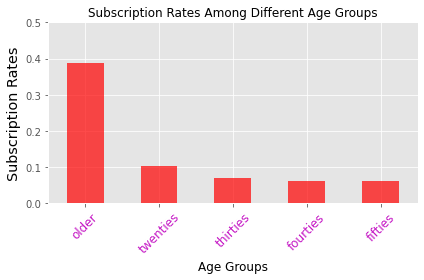

In [204]:
s.plot(kind = "bar", color = "r", alpha = 0.7)
plt.ylim(0,0.5)
plt.xlabel("Age Groups", color = "k", fontsize = "large")
plt.ylabel("Subscription Rates", color = "k", fontsize = "x-large")
plt.xticks(rotation = 45, color = "m", alpha = 0.9, fontsize = "large")
plt.title("Subscription Rates Among Different Age Groups", fontsize = "large")
plt.tight_layout()

**It can be seen from the graph that older customers tend to subscribe more almost up to 4-6 times than other age groups.**

### BALANCE

In [205]:
balance_ranges = [data6["balance"].min(), 0,10000,20000,30000,data6["balance"].max()]

In [206]:
balance_labels = ["in_debt", "0-10k", "10k-20k","20k-30k",">30k"]

In [207]:
data6["balance_"] = pd.cut(data6["balance"], bins = balance_ranges, labels = balance_labels)

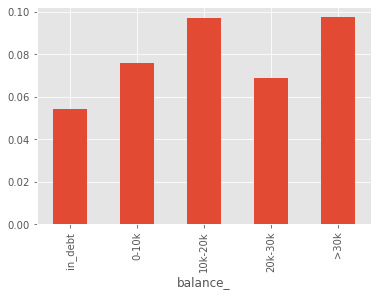

In [208]:
data6.groupby("balance_")["target"].mean().plot(kind = "bar")

**It can be seen from the graph that balance records significantly affecting subscription rates. In general, the greater the balance means
greater possibility for a customer to subscribe.**

### JOB 

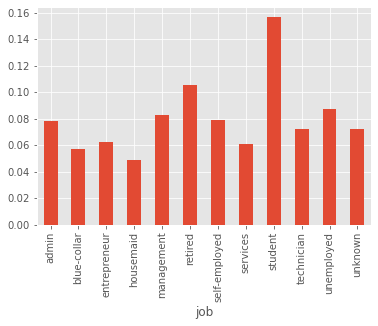

In [209]:
data6.groupby("job")["target"].mean().plot(kind = "bar")

**Again, we can see that  different jobs contribute differently to the subscriptions. It is important to note that students 
tend to subscribe more than any other professions. We can keep track of that and focus more on students in order to increase
success rate for subscriptions. Second most subscribed job is retired people. It is reasonable because retired people may wish
to invest some money for their children etc.**

### MARITAL STATUS

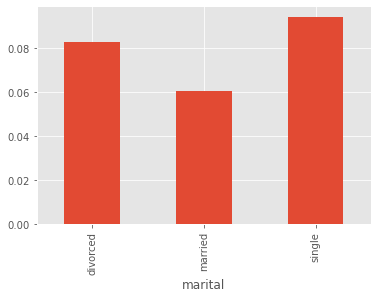

In [210]:
data6.groupby("marital")["target"].mean().plot(kind = "bar")

**It looks like single people tend to subscribe more than married and divorced customers. It can again used as a factor while
doing segmentations.**

### DATA FILTERING FOR SEGMENTATION

**I will choose some segments here based on the visualizations above and look their subscription rates in order to make sure
that my segmentation works as intended.**

**OLDER PEOPLE**

In [211]:
data6[(data6["age_"] == "older")]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,target,age_,balance_
199,61,blue-collar,divorced,primary,no,1428,yes,no,unknown,5,may,82,2,no,0,older,0-10k
575,61,retired,married,secondary,no,195,yes,yes,unknown,6,may,179,1,no,0,older,0-10k
1233,61,blue-collar,married,primary,no,734,yes,no,unknown,8,may,204,1,no,0,older,0-10k
2435,61,retired,married,primary,no,1060,yes,no,unknown,13,may,118,1,no,0,older,0-10k
2992,61,retired,married,secondary,no,4248,yes,no,unknown,14,may,71,1,no,0,older,0-10k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34150,61,retired,divorced,secondary,no,927,no,no,cellular,30,apr,427,3,yes,1,older,0-10k
34244,67,retired,married,unknown,no,696,no,no,telephone,4,may,77,2,no,0,older,0-10k
34337,63,management,married,unknown,no,2352,no,no,telephone,4,may,475,7,yes,1,older,0-10k
34518,66,admin,single,secondary,no,10177,no,no,cellular,5,may,272,4,no,0,older,10k-20k


In [212]:
segment1 = data6[(data6["age_"] == "older")]

In [213]:
segment1["target"].mean()

0.3888888888888889

**It is indeed indicating that older people has pretty high  subscription rates. I will also add job filtering to that to see
how it will affect the subscription rates.**

**RETIRED OLDER PEOPLE**

In [214]:
data6[(data6["age_"] == "older") & ( data6["job"] == "retired")]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,target,age_,balance_
575,61,retired,married,secondary,no,195,yes,yes,unknown,6,may,179,1,no,0,older,0-10k
2435,61,retired,married,primary,no,1060,yes,no,unknown,13,may,118,1,no,0,older,0-10k
2992,61,retired,married,secondary,no,4248,yes,no,unknown,14,may,71,1,no,0,older,0-10k
3615,61,retired,married,secondary,no,280,yes,no,unknown,15,may,88,3,no,0,older,0-10k
6722,61,retired,divorced,secondary,no,1857,yes,no,unknown,28,may,173,4,no,0,older,0-10k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33860,73,retired,married,primary,no,542,no,no,telephone,29,apr,107,5,no,0,older,0-10k
34128,85,retired,married,primary,no,98,no,no,cellular,30,apr,416,1,yes,1,older,0-10k
34150,61,retired,divorced,secondary,no,927,no,no,cellular,30,apr,427,3,yes,1,older,0-10k
34244,67,retired,married,unknown,no,696,no,no,telephone,4,may,77,2,no,0,older,0-10k


In [215]:
segment2 = data6[(data6["age_"] == "older") & ( data6["job"] == "retired")]

In [216]:
segment2["target"].mean()

0.4110429447852761

**Yes, we got a higher number which shows that retired older people tend to subscribe more than any other age groups and professions.
This can be used as a customer segmentation strategy since it gives up to 6 times more subsciption rates than the original
dataset total customers ( remember subscription rate was %7.2 for all customers ).**

**STUDENTS WITH HIGH BALANCE**

In [217]:
data6[data6["job"] == "student"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,target,age_,balance_
151,26,student,single,secondary,no,0,yes,no,unknown,5,may,610,2,no,0,twenties,in_debt
203,35,student,single,unknown,no,298,yes,no,unknown,5,may,611,2,no,0,thirties,0-10k
265,30,student,single,tertiary,no,25,yes,no,unknown,5,may,89,2,no,0,twenties,0-10k
292,24,student,single,secondary,no,423,yes,no,unknown,5,may,226,3,no,0,twenties,0-10k
297,24,student,single,secondary,no,82,yes,no,unknown,5,may,204,2,no,0,twenties,0-10k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39949,27,student,single,secondary,no,121,no,no,cellular,2,jun,145,2,no,0,twenties,0-10k
39956,30,student,single,secondary,no,155,no,no,cellular,3,jun,206,3,no,0,twenties,0-10k
39957,40,student,single,secondary,no,595,yes,no,cellular,3,jun,406,2,yes,1,thirties,0-10k
39981,31,student,single,secondary,no,216,no,no,cellular,3,jun,138,1,no,0,thirties,0-10k


In [218]:
data6[data6["job"] == "student"]["target"].mean()

0.15648854961832062

**It can be seen that students subscription rate is twice the total subscription rates. I will go further and create a segment which students with high balance values. Lets see what ratio we will get.**

In [219]:
segment3 = data6[(data6["job"] == "student") &  ((data6["balance_"] == ">30k")  | (data6["balance_"] == "20k-30k" ) | (data6["balance_"] == "10k-20k"))]

In [220]:
segment3["target"].mean()

0.375

**Yes, this is again a high subscription rate ( up to 5 times). We can use it as a customer segmentation strategy. If a student
has a high balance average, it means higher probability of being a subscriber.**

**Lets check another features to find another segment which might has high subscription rates.**

In [221]:
data6.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,target,age_,balance_
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,0,fifties,0-10k
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,0,fourties,0-10k
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,0,thirties,0-10k
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,0,fourties,0-10k
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,0,thirties,0-10k


**EDUCATION LEVEL**

In [222]:
data6.groupby("education")["target"].mean()

education
primary      0.056300
secondary    0.067546
tertiary     0.091826
unknown      0.062704
Name: target, dtype: float64

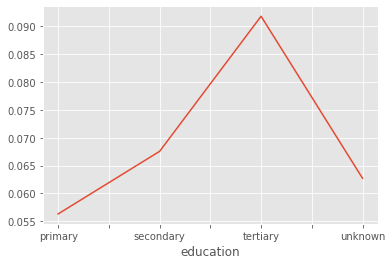

In [223]:
data6.groupby("education")["target"].mean().plot()

**HOUSING AND LOAN**

In [224]:
data6.groupby(["housing", "loan"])["target"].mean()

housing  loan
no       no      0.096116
         yes     0.058501
yes      no      0.062714
         yes     0.052443
Name: target, dtype: float64

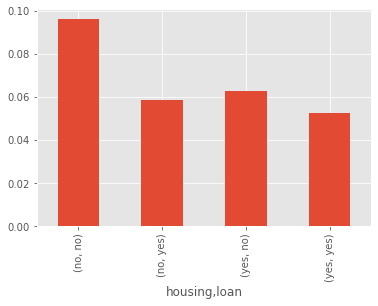

In [225]:
data6.groupby(["housing", "loan"])["target"].mean().plot(kind = "bar")

**Above 2 calculations shows that customers with higher education tend to subscribe more. In addition to this customers who 
did not have any kind of loans also subscribed more. We can combine these 2 features to create a segment where customers with
higher education levels and no loans.**

In [226]:
segment4 = data6[( (data6["education"] == "secondary") | (data6["education"] == "tertiary") ) & ( data6["housing"] == "no")  & ( data6["loan"] == "no")   ]

In [227]:
segment4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,target,age_,balance_
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,no,0,fifties,in_debt
48,55,technician,divorced,secondary,no,0,no,no,unknown,5,may,160,1,no,0,fifties,in_debt
66,60,retired,married,tertiary,no,100,no,no,unknown,5,may,528,1,no,0,fifties,0-10k
77,55,services,divorced,secondary,no,91,no,no,unknown,5,may,349,1,no,0,fifties,0-10k
81,47,services,divorced,secondary,no,164,no,no,unknown,5,may,212,1,no,0,fourties,0-10k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39993,32,management,married,tertiary,no,3154,no,no,cellular,3,jun,126,1,no,0,thirties,0-10k
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no,0,fifties,0-10k
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes,1,twenties,0-10k
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes,1,fifties,0-10k


In [228]:
segment4["target"].mean()

0.10317084713677237

**It is indeed a bit higher ratio but personally I did not prefer it. I will go filter the data more strict and see what will happen.**

**CUSTOMERS WITH HIGH BALANCE, NO LOANS AND HIGHER EDUCATION LEVELS**

In [229]:
segment5 = data6[( (data6["education"] == "secondary") | (data6["education"] == "tertiary") ) & ( data6["housing"] == "no") 
      & ( data6["loan"] == "no") & ( (data6["balance_"] == "10k-20k") |  (data6["balance_"] == "20k-30k")  | (data6["balance_"] == ">30k") ) ]

In [230]:
segment5["target"].mean()

0.11151079136690648

**This is a bit higher than the original dataset subscription rates. It can be used as a customer segmentation strategy but not
powerful than the 2 segments above.**

#### DURATION OF CALLS -- Which is the primer determiner for subscription rates.

**I will now combine 2 most important features to create a segment where duration of calls higher than (average + 1 standard deviation)  and customer
balance value is also higher than the average. I expect subscription rates to be pretty high to use in a segmentation strategy.**

In [231]:
data6["duration"].describe()

count    40000.000000
mean       254.824300
std        259.366498
min          0.000000
25%        100.000000
50%        175.000000
75%        313.000000
max       4918.000000
Name: duration, dtype: float64

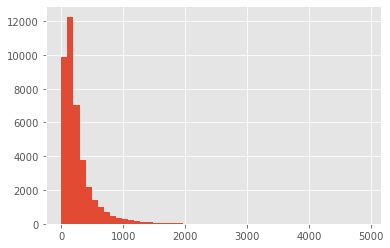

In [232]:
data6["duration"].hist(bins = 50)

In [233]:
duration_ranges = [0,100,250,500,1000, data6["duration"].max()]

In [234]:
duration_ranges

[0, 100, 250, 500, 1000, 4918]

In [235]:
duration_labels = ["100", "100-250", "250-500", "500-1000", ">1000"]

In [236]:
data6["duration_"] = pd.cut(data6["duration"], bins = duration_ranges, labels = duration_labels)

In [237]:
data6.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,target,age_,balance_,duration_
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,0,fifties,0-10k,250-500
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,0,fourties,0-10k,100-250
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,0,thirties,0-10k,100
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,0,fourties,0-10k,100
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,0,thirties,0-10k,100-250


In [238]:
segment5 = data6[ (data6["duration_"] == "500-1000") | (data6["duration_"] == ">1000")]

In [239]:
segment5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,target,age_,balance_,duration_
12,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,no,0,fifties,0-10k,500-1000
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,no,0,fifties,in_debt,>1000
38,36,admin,divorced,secondary,no,506,yes,no,unknown,5,may,577,1,no,0,thirties,0-10k,500-1000
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,no,0,fifties,0-10k,>1000
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,no,0,fifties,0-10k,500-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39960,27,technician,single,tertiary,no,200,no,no,cellular,3,jun,508,1,no,0,twenties,0-10k,500-1000
39968,42,blue-collar,married,secondary,no,2913,no,no,cellular,3,jun,705,1,yes,1,fourties,0-10k,500-1000
39979,60,management,divorced,tertiary,no,366,no,no,cellular,3,jun,593,1,yes,1,fifties,0-10k,500-1000
39988,55,management,divorced,tertiary,no,2383,no,no,cellular,3,jun,591,2,yes,1,fifties,0-10k,500-1000


In [240]:
segment5.target.mean()

0.3876297394619784

**This is a perfect ratio to use it as a segmentation strategy ( up to 5 times higher than total customers subscription rates ). However, I will go further and do more filtering in order to increase
the subscription rates in this segment.**

In [241]:
segment6 = data6[ ( (data6["duration_"] == "500-1000") | (data6["duration_"] == ">1000") ) & 
                  ( (data6["balance_"] == "10k-20k") | (data6["balance_"] == ">30k") )]

In [242]:
segment6.target.mean()

0.42857142857142855

**Yes, we got a pretty high ratio ( up to 6 times ). It shows that as the duration of calls increases the subscription rates 
also increases. When customer has a high balance value and made a long call, we can understand that he or she is a potential
subscriber.**

## FINAL WORDS 

**I created 3 different segments which are "Retired Older People", "Students with High Balance" and "Customers who made long calls and have high balance". They have subscription rates of %41, %37.5 and %42.8 respectively. Knowing total customers 
subscription rate is %7.2, these ratios mean a lot for customer acquisition strategy. Important features for determining 
customer subscription rate is shown in the feature importances figure. As a reminder, duration of calls, balance are 2 most
dominant features while determining customer subscription rates. Also, age group is another big player in this regard. People
older than 60 tend to subscribe 4 times more than any other age groups. As for professions, "students" surprisingly taking the
leader position. It may because some students want to invest some money for future plans such as doing masters, studying abroad etc. As for machine learning part, LinearSVC achieved the best results in a pretty short time. Its accuracy score average on 5 folds
cross validation is %92.92.
This project was a supervised learning binary classification task and 8 classifiers are trained and their performances evaluated 
based on their accuracy scores and training times.**